# Задача Коши

# Метод Рунге-Кутты

Метод Рунге-Кутты используют для расчета стандартных моделей достаточно часто, так как при небольшом объеме вычислений он обладает точностью метода $O^{4}(h)$

Это численный метод для решения задачи Коши для обыкновенных дифференциальных уравнений (ОДУ) *первого* порядка:

Для построения разностной схемы интегрирования воспользуемся разложением функции

$$\frac{dy}{dx} = f(x, y(x)), 0<x\le T, y(0) = y_0$$

в ряд Тейлора.

Здесь $x$ - независимая переменная, $y$ - вектор-функция неизвестных функций, $f$ - заданная функция правой части уравнения.

Идея метода Рунге-Кутты заключается в том, что на каждом шаге метода используется взвешенная сумма нескольких приближенных значений производной $f$ в различных точках. Результатом является приближенное значение решения $y$ в точке $x_{n+1}=x_n+h$, где $h$ - шаг метода.

Метод Рунге-Кутты имеет много различных форм, которые отличаются порядком точности, числом и расположением точек весовой сетки. Одним из наиболее популярных вариантов является метод Рунге-Кутты четвертого порядка точности (RK4), который вычисляет новое приближенное значение $y_{n+1}$ следующим образом:

$$\begin{aligned}
k_1 &= f(x_n, y_n) \\
k_2 &= f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1) \\
k_3 &= f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2) \\
k_4 &= f(x_n + h, y_n + hk_3) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) \\
\end{aligned}$$

Здесь $k_1$, $k_2$, $k_3$ и $k_4$ - вспомогательные переменные, которые представляют приближенные значения производной $f$ в различных точках. Шаг метода $h$ выбирается таким образом, чтобы обеспечить достаточную точность метода.

Метод Рунге-Кутты является одним из наиболее эффективных и универсальных методов для численного решения задач Коши для ОДУ. Он легко реализуется и может быть адаптирован для работы с жесткими системами уравнений.



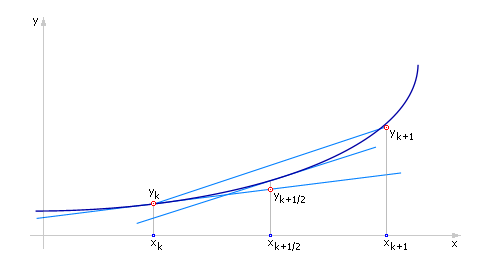

> Иллюстрация расчета на шаге методом Рунге-Кутты
при значении параметра α = 1



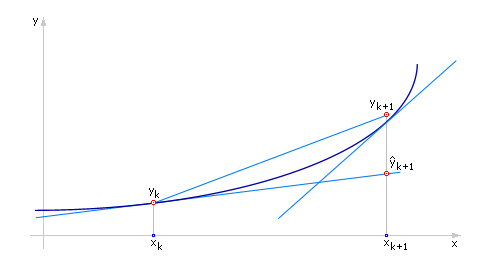

> Иллюстрация расчета на шаге методом Рунге-Кутты
при значении параметра α = 0.5



**08.** Consider the problem

$$
y'= x − 10y,\ \ \ \  y(0) = 10
$$

* (a) Verify that the analytical solution is $y(x) = 0.1x − 0.01 + 10.01e^{−10x}$ .
* (b) Determine the step size h that you would use in numerical solution with the (nonadaptive) Runge-Kutta method.
* (c) Integrate the initial value problem from $x = 0$ to $5$ with the Runge-Kutta method using  $h = 0.1,  h = 0.25,  h = 0.5$. Comment on the
results.
* (d) Integrate the initial value problem from $x = 0$ to $10$ with the adaptive
Runge-Kutta method and plot the result.


Размер шага h = 0.1
y(5) = 0.4999999999999998

Размер шага h = 0.25
y(5) = 0.4917290061261133

Размер шага h = 0.5
y(5) = 2345744138881.256



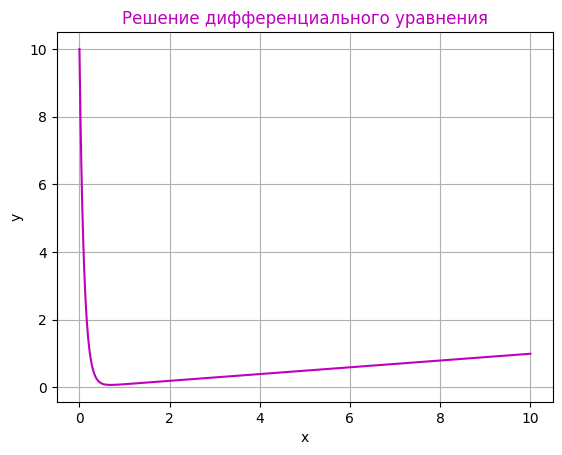

In [ ]:
from sympy import symbols, Function, exp, simplify, diff

x = symbols('x')
y = Function('y')(x)

# дифференциальное уравнение
eq = y.diff(x) - x + 10*y

# начальные условия
y0 = 10

# аналитическое решение
sol = simplify(y.subs({y: (0.1*x - 0.01 + 10.01*exp(-10*x)), x: 0}) - y0)
assert sol == 0

# Размер шага
h = 0.1

def runge_kutta(f, y0, x0, h, x_end):
    x_vals = [x0]
    y_vals = [y0]
    while x_vals[-1] < x_end:
        x = x_vals[-1]
        y = y_vals[-1]
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5*h, y + 0.5*k1)
        k3 = h * f(x + 0.5*h, y + 0.5*k2)
        k4 = h * f(x + h, y + k3)
        y_next = y + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        x_next = x + h
        x_vals.append(x_next)
        y_vals.append(y_next)
    return x_vals, y_vals


def f(x, y):
    return x - 10*y


x0 = 0
y0 = 10
x_end = 5

for h in [0.1, 0.25, 0.5]:
    x_vals, y_vals = runge_kutta(f, y0, x0, h, x_end)
    print(f"Размер шага h = {h}")
    print(f"y({x_end}) = {y_vals[-1]}\n")

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def ad_runge_kutta(f, y0, x0, x_end, h0, tol):
    def rk_step(f, x, y, h):
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5*h, y + 0.5*k1)
        k3 = h * f(x + 0.5*h, y + 0.5*k2)
        k4 = h * f(x + h, y + k3)
        y_next = y + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        return y_next

    x_vals = [x0]
    y_vals = [y0]
    h = h0
    while x_vals[-1] < x_end:
        x = x_vals[-1]
        y = y_vals[-1]

        # Оценка ошибки
        y1 = rk_step(f, x, y, h)
        y2 = rk_step(f, x+h, rk_step(f, x, y, 0.5*h), 0.5*h)
        error = np.abs(y1 - y2)

        # Находим размер шага
        if error < tol:
            y_next = y1
            x_next = x + h
            x_vals.append(x_next)
            y_vals.append(y_next)
        h *= 0.9 * (tol / error)**0.25  # оптимальный коэффициент масштабирования, 0.25 в данном случа – порядок метода РК
    return x_vals, y_vals


x0 = 0
y0 = 10
x_end = 10
h0 = 0.1
tol = 1e-5

x_vals, y_vals = ad_runge_kutta(f, y0, x0, x_end, h0, tol)

plt.plot(x_vals, y_vals, color='m')
plt.title("Решение дифференциального уравнения", color='m')
plt.xlabel("x")
plt.ylabel("y")
plt.grid ( True )
plt.show()


# Краевая задача

**Метод стрельбы** — численный метод, заключающийся в сведении краевой задачи к некоторой задаче Коши для той же системы дифференциальных уравнений.

Его *идея* заключается в следующем: первое решение при последовательном изменении аргумента и повторении вычислений становится точнее

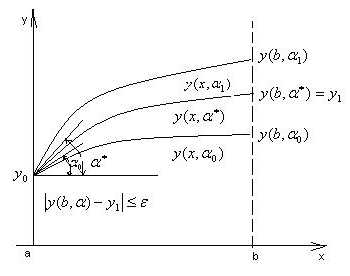



Итак, это численный метод решения краевой задачи для обыкновенных дифференциальных уравнений второго порядка. Метод основан на приведении краевой задачи к задаче Коши путем задания начальных условий для решения в некоторой точке.

Рассмотрим общую форму краевой задачи для уравнения второго порядка:
\begin{equation*}
y′′(x)=f(x, y(x), y′(x)), \ a≤x≤b
\end{equation*}
с краевыми условиями $y(a) = \alpha$ и $y(b) = \beta$:

Задача Коши:
\begin{equation*}
y''(x) = f(x, y(x), y'(x)), \quad y(a) = \alpha, \quad y'(a) = \eta
\end{equation*}

Вычисление значения функции в точке $b$:
\begin{equation*}
y_b = y(a) + \int_a^b y'(x) dx
\end{equation*}

Обновление начального значения производной:
\begin{equation*}
\eta_{n+1} = \eta_n - \frac{y_b - \beta}{y'(b)}
\end{equation*}

Здесь $\eta_n$ обозначает значение производной на $n$-й итерации.

**Метод конечных разностей** заключается в замене частных производных в дифференциальных операторах их приближенными значениями, выраженными через дискретные значения функции в узлах расчетной сетки.

Метод является достаточно универсальным численным методом ориентированным на решение зада с граничными условиями как в одномерных, так и многомерных системах. Причем МКР является одним из немногих численных методов, который может быть использован для решения математических моделей процессов (объектов) с распределенными параметрами, описываемых дифференциальными уравнениями в частных производных. В этом случае переменные исследуемой модели могут зависеть как от времени t, так и от пространственных координат (x, y) в двумерном случае и (x, y, z) в трехмерном.

Общей идеей МКР является сведение исходной задачи с граничными условиями (краевой задачи) к более простой задаче решения системы линейных или нелинейных алгебраических уравнений. Вид получаемой системы алгебраических уравнений зависит от вида исходного дифференциального уравнения.


Рассмотрим общую форму краевой задачи для уравнения второго порядка:

$$y''(x) = f(x, y(x), y'(x)), \quad a \leq x \leq b$$

с краевыми условиями:

$$y(a) = \alpha, \quad y(b) = \beta$$

Метод конечных разностей заключается в аппроксимации производных функции в узлах сетки, после чего производится дискретизация уравнения и краевых условий на сетке. В результате получается система линейных алгебраических уравнений, которая может быть решена численно.

Для аппроксимации производных на сетке используются различные формулы. Например, для первой производной можно использовать центральную разность:

$$y'(x_i) \approx \frac{y_{i+1} - y_{i-1}}{2h}$$

где $h$ - шаг сетки, $x_i = a + ih$ - координата узла сетки, а $y_i$ - значение функции в узле $x_i$.

Аналогично, для второй производной можно использовать центральную разность:

$$y''(x_i) \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}$$

Далее, подставляя эти аппроксимации производных в исходное уравнение и краевые условия, получаем систему линейных алгебраических уравнений, которую можно решить численно.

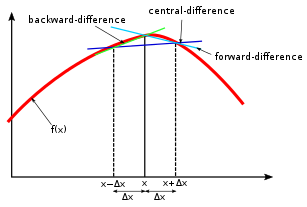

<function matplotlib.pyplot.show(close=None, block=None)>

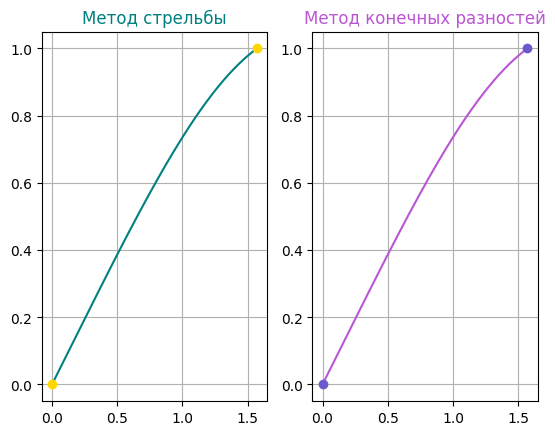

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import root
import numpy as np

f = lambda u,tt: np.array([u[1], (0.2*tt-1)*(u[0]**2)])

t_0 = 0; T = np.pi/2; M = 500

def ODESolving (t_0, T, u_0, M):
    tau = (T - t_0)/M
    t = np.linspace(t_0, T, M + 1)
    U = np.zeros((M + 1, 2))
    U[0] = u_0
    for m in range(M):
        w = np.zeros((4,4))
        w_1 = f(U[m], t[m])
        w_2 = f(U[m] + tau*0.5*w_1, t[m] + 0.5*tau)
        w_3 = f(U[m] + tau*0.5*w_2, t[m] + 0.5*tau)
        w_4 = f(U[m] + tau*w_3, t[m]+1*tau)
        U[m + 1] = U[m] + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)
    return U,t

def shooting(f, eps, N_max, a, b):
    c = (a+b)/2
    difa,t = ODESolving(t_0, T, [0,a], M)
    difa = difa [M,0] - 1
    difb,t = ODESolving(t_0, T, [0,b], M)
    difb = difb [M,0] - 1
    difc = difa
    N=0
    while (abs(difb-difa) > eps):
        if (N > N_max):
            print("N > N_max")
            break
        c = (b+a)/2
        difc,t = ODESolving(t_0, T, [0,c], M)
        difc = difc [M,0] - 1
        if difc*difa >= 0:
            a = c; difa = difc
        elif difc*difa < 0:
            b=c; difb = difc
        N+=1
    return ODESolving(t_0, T, [0,c], M)

c,ttt = shooting(f,1e-10, 1000, -10, 10)

h = np.pi/2/M;
X = np.linspace(t_0, T, M+1)

def func(X):
    Y = np.zeros(M+1)
    Y[0] = X[0]
    Y[M] = X[M]-1
    Y[1:M] = np.array([X[i-1] - 2*X[i] + (1 - 0.2*h*i)*(X[i]**2)*(h**2) + X[i+1] for i in range(1,M)])
    return Y

y = root(func, np.zeros(M+1))

plt.subplot (1, 2, 1)
plt.title("Метод стрельбы", color='teal')
plt.plot(ttt, c[:,0], color='teal')
plt.plot(0, 0, 'o', color='gold')
plt.plot(np.pi/2, 1, 'o', color='gold')
plt.grid ( True )
plt.subplot (1, 2, 2)
plt.title("Метод конечных разностей", color='mediumorchid')
plt.plot(X, y.x, color='mediumorchid')
plt.plot(0,0,'o', color='slateblue')
plt.plot(np.pi/2,1,'o', color='slateblue')
plt.grid ( True )
plt.show